## Clustering asthma-related papers in CORD-19 dataset

### Introduction
The goal of this project is to explore research topics in asthma and coronviruses. What are the most popular topics the research community is focused on, before and after the COVID-19 outbreak? Are the areas of interest around asthma and coronaviruses the same before and after the appearance of SARS-CoV-2? 

In this project, I use Natural Language Processing (NLP) techniques in Python, to explore topics of research between asthma and coronaviruses before the identification of SARS-CoV-2, but also after the outbreak of the pandemic. The analysis is based on clustering scientific publications, in order to create groups of papers with similar topics. Two groups of clusters are created, one for papers published before and one for papers published after the COVID-19 outbreak. For the two periods of times, clustering aims at identifying popular research topics and finding potential gaps in research between asthma and the new coronavirus.

More details about the motivation and the scientific background of this data analysis can be found here:

### Data
In response to the COVID-19 pandemic a large database, the COVID-19 Open Research Dataset (CORD-19), was created and has been made publicly available. CORD-19 is a resource of hundreds of thousands scholarly articles, about COVID-19, SARS-CoV-2, and related coronaviruses: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

### Collecting and Preprocessing Data

From this large database, I keep only those papers where the word "asthma" appears at least once in the abstract.

I went through the following text preprocessing steps, using NLTK and SpaCy:
- Removal of stop words
- Removal of non-English publications

Using their publication date, I divided the papers into those published before the outbreak of the pandemic (December 2019) and those published after. For the two groups of papers I applied:
- Tokenization
- Stemming
- Use of the Scikit-learn's Tfidf Vectorizer to transform tokens into a matrix of TF-IDF features
- Application of the KMeans algorithm for Clustering
- Application of the PCA algorithm for dimensionality reduction and clusters' visualization

*Note: This data analysis was performed in February 2021 and doesn't take into account potential databases updates.*


### Loading libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
pd.options.display.max_colwidth = 500

In [3]:
import nltk
import string
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from langdetect import detect

In [4]:
import plotly.express as px
import plotly.io as pio
pio.renderers
import plotly.graph_objects as go

import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator


In [5]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


In [6]:
spacy_stop_words = ['whence', 'here', 'show', 'were', 'why', 'n’t', 'the', 'whereupon', 'not', 'more', 'how', 'eight', 'indeed', 'i', 'only', 'via', 'nine', 're', 'themselves', 'almost', 'to', 'already', 'front', 'least', 'becomes', 'thereby', 'doing', 'her', 'together', 'be', 'often', 'then', 'quite', 'less', 'many', 'they', 'ourselves', 'take', 'its', 'yours', 'each', 'would', 'may', 'namely', 'do', 'whose', 'whether', 'side', 'both', 'what', 'between', 'toward', 'our', 'whereby', "'m", 'formerly', 'myself', 'had', 'really', 'call', 'keep', "'re", 'hereupon', 'can', 'their', 'eleven', '’m', 'even', 'around', 'twenty', 'mostly', 'did', 'at', 'an', 'seems', 'serious', 'against', "n't", 'except', 'has', 'five', 'he', 'last', '‘ve', 'because', 'we', 'himself', 'yet', 'something', 'somehow', '‘m', 'towards', 'his', 'six', 'anywhere', 'us', '‘d', 'thru', 'thus', 'which', 'everything', 'become', 'herein', 'one', 'in', 'although', 'sometime', 'give', 'cannot', 'besides', 'across', 'noone', 'ever', 'that', 'over', 'among', 'during', 'however', 'when', 'sometimes', 'still', 'seemed', 'get', "'ve", 'him', 'with', 'part', 'beyond', 'everyone', 'same', 'this', 'latterly', 'no', 'regarding', 'elsewhere', 'others', 'moreover', 'else', 'back', 'alone', 'somewhere', 'are', 'will', 'beforehand', 'ten', 'very', 'most', 'three', 'former', '’re', 'otherwise', 'several', 'also', 'whatever', 'am', 'becoming', 'beside', '’s', 'nothing', 'some', 'since', 'thence', 'anyway', 'out', 'up', 'well', 'it', 'various', 'four', 'top', '‘s', 'than', 'under', 'might', 'could', 'by', 'too', 'and', 'whom', '‘ll', 'say', 'therefore', "'s", 'other', 'throughout', 'became', 'your', 'put', 'per', "'ll", 'fifteen', 'must', 'before', 'whenever', 'anyone', 'without', 'does', 'was', 'where', 'thereafter', "'d", 'another', 'yourselves', 'n‘t', 'see', 'go', 'wherever', 'just', 'seeming', 'hence', 'full', 'whereafter', 'bottom', 'whole', 'own', 'empty', 'due', 'behind', 'while', 'onto', 'wherein', 'off', 'again', 'a', 'two', 'above', 'therein', 'sixty', 'those', 'whereas', 'using', 'latter', 'used', 'my', 'herself', 'hers', 'or', 'neither', 'forty', 'thereupon', 'now', 'after', 'yourself', 'whither', 'rather', 'once', 'from', 'until', 'anything', 'few', 'into', 'such', 'being', 'make', 'mine', 'please', 'along', 'hundred', 'should', 'below', 'third', 'unless', 'upon', 'perhaps', 'ours', 'but', 'never', 'whoever', 'fifty', 'any', 'all', 'nobody', 'there', 'have', 'anyhow', 'of', 'seem', 'down', 'is', 'every', '’ll', 'much', 'none', 'further', 'me', 'who', 'nevertheless', 'about', 'everywhere', 'name', 'enough', '’d', 'next', 'meanwhile', 'though', 'through', 'on', 'first', 'been', 'hereby', 'if', 'move', 'so', 'either', 'amongst', 'for', 'twelve', 'nor', 'she', 'always', 'these', 'as', '’ve', 'amount', '‘re', 'someone', 'afterwards', 'you', 'nowhere', 'itself', 'done', 'hereafter', 'within', 'made', 'ca', 'them']

In [7]:
# extending the list of stopwords taken into account
stop_words.extend(spacy_stop_words)

### Data overview

In [8]:
# Loading the csv file to a pandas dataframe, to have a look at the papers' metadata:
asthma_df = pd.read_csv("asthma_data.csv")
asthma_df.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower
0,qva0jt86,4ba79e54ecf81b30b56461a6aec2094eaf7b7f06,PMC,Relevance of human metapneumovirus in exacerbations of COPD,10.1186/1465-9921-6-150,PMC1334186,16371156.0,cc-by,"BACKGROUND AND METHODS: Human metapneumovirus (hMPV) is a recently discovered respiratory virus associated with bronchiolitis, pneumonia, croup and exacerbations of asthma. Since respiratory viruses are frequently detected in patients with acute exacerbations of COPD (AE-COPD) it was our aim to investigate the frequency of hMPV detection in a prospective cohort of hospitalized patients with AE-COPD compared to patients with stable COPD and to smokers without by means of quantitative real-tim...",2005-12-21,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/4ba79e54ecf81b30b56461a6aec2094eaf7b7f06.json,document_parses/pmc_json/PMC1334186.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1334186/,NaN,"background and methods: human metapneumovirus (hmpv) is a recently discovered respiratory virus associated with bronchiolitis, pneumonia, croup and exacerbations of asthma. since respiratory viruses are frequently detected in patients with acute exacerbations of copd (ae-copd) it was our aim to investigate the frequency of hmpv detection in a prospective cohort of hospitalized patients with ae-copd compared to patients with stable copd and to smokers without by means of quantitative real-tim...",relevance of human metapneumovirus in exacerbations of copd
1,chz8luni,d68d71553d3a31381c0c3851351f912a9a7be1c9,PMC,Surfactant therapy for acute respiratory failure in children: a systematic review and meta-analysis,10.1186/cc5944,PMC2206432,17573963.0,cc-by,"INTRODUCTION: Exogenous surfactant is used to treat acute respiratory failure in children, although the benefits and harms in this setting are not clear. The objective of the present systematic review is to assess the effect of exogenous pulmonary surfactant on all-cause mortality in children mechanically ventilated for acute respiratory failure. METHODS: We searched the MEDLINE, EMBASE, CINAHL and Ovid Healthstar databases, the bibliographies of included trials and review articles, conferen...",2007-06-15,...,Crit Care,NaN,NaN,NaN,document_parses/pdf_json/d68d71553d3a31381c0c3851351f912a9a7be1c9.json,document_parses/pmc_json/PMC2206432.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2206432/,NaN,"introduction: exogenous surfactant is used to treat acute respiratory failure in children, although the benefits and harms in this setting are not clear. the objective of the present systematic review is to assess the effect of exogenous pulmonary surfactant on all-cause mortality in children mechanically ventilated for acute respiratory failure. methods: we searched the medline, embase, cinahl and ovid healthstar databases, the bibliographies of included trials and review articles, conferen...",surfactant therapy for acute respiratory failure in children: a systematic review and meta-analysis
2,3zh8jmc2,fe2000f280297c40bc53ce95d703a9ca6aac19fd,PMC,Differential Regulation of Type I Interferon and Epidermal Growth Factor Pathways by a Human Respirovirus Virulence Factor,10.1371/journal.ppat.1000587,PMC2736567,19806178.0,cc-by,"A number of paramyxoviruses are responsible for acute respiratory infections in children, elderly and immuno-compromised individuals, resulting in airway inflammation and exacerbation of chronic diseases like asthma. To understand the molecular pathogenesis of these infections, we searched for cellular targets of the virulence protein C of human parainfluenza virus type 3 (hPIV3-C). We found that hPIV3-C interacts directly through its C-terminal domain with STAT1 and GRB2, whereas C proteins...",2009-09-18,...,PLoS Pathog,NaN,NaN,NaN,document_parses/pdf_json/fe2000f280297c40bc53ce95d703a9ca6aac19fd.json,

There are 2567 papers containing the word "asthma", among the coronavirus-related publications 

In [9]:
asthma_df.shape

(2567, 21)

In [10]:
# Use of langdetect google library to dect the language of the "abstract" column in our dataframe

asthma_df["lang_detect"] = asthma_df["abstract_lower"].apply(detect)

In [11]:
# As non-english papers occupy only a small percent of our total papers, they are excluded from the analysis

asthma_df["lang_detect"].value_counts()

en    2526
fr      12
de      12
es       9
ru       3
pt       3
nl       2
Name: lang_detect, dtype: int64

There are 2528 papers in total, written in english.

In [12]:
asthma_df = asthma_df.loc[asthma_df['lang_detect'] == "en"]
asthma_df.shape

(2526, 22)

I'd like to quickly vizualize the text of these papers, that's why I create a wordcloud where the most frequent words are represented by a bigger font! I'd like to give a shape to my image and use it as a cover for my article! What would it be?

In [13]:
virus_mask = np.array(Image.open("coronavirus_canvas.png"))

In [14]:
text = " ".join(ab for ab in asthma_df["abstract_lower"].tolist())

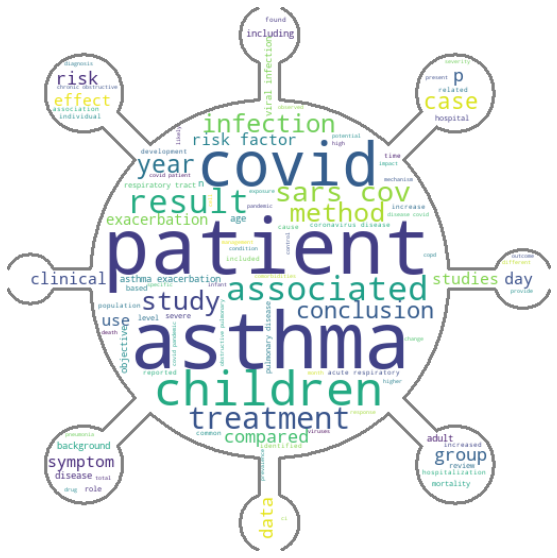

In [15]:
wc = WordCloud(background_color="white", max_words=100, mask=virus_mask,
               stopwords=stop_words, contour_width=3, contour_color='gray')

wc.generate(text)

wc.to_file("coronavirus_new.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's go back to data processing!


Papers are divided between those published before the identification of the new coronavirus, SARS-CoV-2, and those published after. I pick December 2019 as the cut-off date.

In [16]:
asthma_before_covid = asthma_df.loc[asthma_df['publish_time']<"2019-12-01"].reset_index(drop=True)
asthma_after_covid = asthma_df.loc[asthma_df['publish_time']>="2019-12-01"].reset_index(drop=True)

Let's have a look at the number of the papers published, per month, since the covid outbreak. 

In [17]:
asthma_after_covid['publish_time_new'] =  pd.to_datetime(asthma_after_covid['publish_time'])

In [18]:
asthma_after_covid['publish_month_year'] = pd.to_datetime(asthma_after_covid['publish_time']).dt.to_period('M')
asthma_after_covid.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower,lang_detect,publish_time_new,publish_month_year
0,3ki0dzwb,71b8c50ee0e1f4e79e6618301b768befbf943a5d,PMC,Inflammatory and microbiological associations with near-fatal asthma requiring extracorporeal membrane oxygenation,10.1183/23120541.00267-2019,PMC6983494,32010717.0,cc-by-nc,Patients with near-fatal asthma requiring ECMO are more likely to be younger and female and are also likely to have positive viral and fungal isolates on bronchoalveolar lavage when compared to those receiving conventional mechanical ventilation http://bit.ly/2S38SaC,2020-01-27,...,NaN,document_parses/pdf_json/71b8c50ee0e1f4e79e6618301b768befbf943a5d.json,document_parses/pmc_json/PMC6983494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6983494/,NaN,patients with near-fatal asthma requiring ecmo are more likely to be younger and female and are also likely to have positive viral and fungal isolates on bronchoalveolar lavage when compared to those receiving conventional mechanical ventilation http://bit.ly/2s38sac,inflammatory and microbiological associations with near-fatal asthma requiring extracorporeal membrane oxygenation,en,2020-01-27,2020-01
1,okc7wf4n,f4edbfd3e9a8b2d0d76378e6588a5971b070a4c9,PMC,Different effects of acetyl-CoA carboxylase inhibitor TOFA on airway inflammation and airway resistance in a mice model of asthma,10.1007/s43440-019-00027-8,PMC7223088,32048254.0,no-cc,"BACKGROUND AND OBJECTIVE: Acetyl CoA carboxylase (ACC) regulates the differentiation of Th1, Th2, Th17 cells and Treg cells, which play a critical role in airway inflammation of asthma. Here we investigated the role of ACC in the pathogenesis of asthma. METHODS: Chicken Ovalbumin-sensitized and -challenged mice were divided into three groups, PBS group, DMSO (solvent of TOFA) group and ACC inhibitor 5-tetradecyloxy-2-furoic acid (TOFA) + DMSO group. Airway inflammation was assessed with hist...",2020-01-08,...,NaN,document_parses/pdf_json/f4edbfd3e9a8b2d0d76378e6588a5971b070a4c9.json,document_parses/pmc_json/PMC7223088.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7223088/,NaN,"background and objective: acetyl coa carboxylase (acc) regulates the differentiation of th1, th2, th17 cells and treg cells, which play a critical role in airway inflammation of asthma. here we investigated the role of acc in the pathogenesis of asthma. methods: chicken ovalbumin-sensitized and -challenged mice were divided into three groups, pbs group, dmso (solvent of tofa) group and acc inhibitor 5-tetradecyloxy-2-furoic acid (tofa) + dmso group. airway inflammation was assessed with hist...",different effects of acetyl-coa carboxylase inhibitor tofa on airway inflammation and airway resistance in a mice model of asthma,en,2020-01-08,2020-01
2,8lqjl0ee,1f6fa8e138abc1556e853c53dcce8f5e16007fcc,PMC,Risk of Readmission and Mortality Following Hospitalization with Hypercapnic Respiratory Failure,10.1007/s00408-019-00300-w,PMC7223622,31828514.0,no-cc,PURPOSE: Hypercapnic respiratory failure (HRF) is a frequent cause of hospitalization and a common comorbidity in hospitalized patients. There are few studies addressing what factors might predict poor outcomes in this patient population. The purpose of the current study was to investigate characteristics and outcomes of patients hospitalized with HRF. METHODS: A study of patients ≥ 18 years admitted with HRF in a 1-year period. Patients with limited life expectancy related to other conditio...,2019-12-11,...,NaN,document_parses/pdf_json/1f6fa8e138abc1556e853c53dcce8f5e16007fcc.json,document_parses/pmc_json/PMC7223622.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7223622/,NaN,purpose: hypercapnic respiratory failure (hrf) is a frequent cause of hospitalization and a common comorbidity in hospitalized patients. there are few studies addressing what factors might predict poor o

In [19]:
asthma_after_covid = asthma_after_covid.sort_values('publish_month_year')

In [20]:
dates = asthma_after_covid["publish_month_year"].value_counts()

In [21]:
dates_df = dates.to_frame().reset_index()

In [22]:
dates_df = dates_df.sort_values("index")
dates_df.rename(columns={"index": "date_published", "publish_month_year":"number of papers"})

,date_published,number of papers
12,2019-12,10
0,2020-01,600
13,2020-02,9
14,2020-03,8
11,2020-04,19
8,2020-05,69
7,2020-06,74
3,2020-07,92
9,2020-08,60
4,2020-09,90


The graph below illustrates the number of papers published through the last 12-14 months. However, we recognize that the two picks noticed in January 2020 and January 2021 are not completely accurate. As a certain number of papers had only the year (yyyy) mentioned as publication date, January 1st of that year (01/01/yyyy) is taken as their complete date.

As a result, we cannot draw a very accurate example of the distribution of publications through the months.

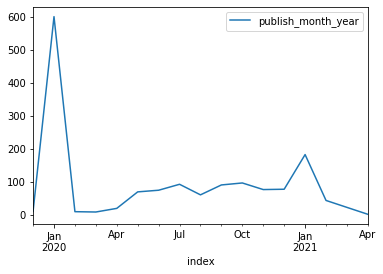

In [23]:
dates_df.plot(x ='index', y = 'publish_month_year')

## Clustering

### Before COVID-19

In [24]:
texts_before = asthma_before_covid["abstract_lower"].tolist()

In [25]:
def custom_tokenizer(str_input):
    
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(str_input)
    words = [word for word in words if word.lower() not in stop_words]
    
    words = [word.replace('â¡', '') for word in words]
    words = [word.replace('â¢', '') for word in words]
    words = [word.replace('â£', '') for word in words]
       
    words = [''.join(c for c in word if c not in string.punctuation+'©±×≤≥●＜--“”→„') for word in words]
    words = [word for word in words if word not in ['‘', '’', '„']]
        
    words = [word for word in words if word]
    words = [word for word in words if not any(char.isdigit() for char in word)]
    
    words = [stemmer.stem(word) for word in words]
    words = [word for word in words if len(word)> 1]
    words = [word for word in words if "asthma" not in word]
    
        
    return words

In [26]:
vec_before = TfidfVectorizer(tokenizer=custom_tokenizer,
                             max_features=2000,
                      stop_words='english')

matrix_before = vec_before.fit_transform(texts_before)
df_before = pd.DataFrame(matrix_before.toarray(), columns=vec_before.get_feature_names())
df_before.head()

c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



,aa,abdelbaset,abil,abl,abnorm,absenc,absent,absolut,abstract,abuelmagd,...,yoonseok,youn,young,younger,younghe,youngho,yr,yu,yun,zhang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For more information about the use of Kmeans in clustering: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [27]:
number_of_clusters=10
km_before = KMeans(n_clusters=number_of_clusters)
km_before.fit(matrix_before)

KMeans(n_clusters=10)

Let's have an overview of our clusters' centers (centroids) and labels. Then we get the top 20 terms for every cluster. In other words, we see which are the most frequently mentioned words per cluster. Note that since we have applied Stemming, we only have the "root" of the words now.

In [28]:
centroids_before, labels_before = km_before.cluster_centers_, km_before.labels_
print(centroids_before)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.57244926e-03 0.00000000e+00 2.41381769e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.12913272e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.28895123e-03 5.65171369e-04 2.23716318e-03 ... 1.32096295e-04
  1.65281186e-04 9.43544963e-05]
 [0.00000000e+00 0.00000000e+00 2.34802271e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [29]:
print("Top terms per cluster:")
order_centroids_before = centroids_before.argsort()[:, ::-1]
terms = vec_before.get_feature_names()
for i in range(number_of_clusters):
    top_words = [terms[ind] for ind in order_centroids_before[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_words)))

Top terms per cluster:
Cluster 0: hmpv children infect respiratori patient human hospit viru metapneumoviru detect rsv pneumonia year outpati pathogen studi clinic ari influenza viral
Cluster 1: diseas lung pulmonari chronic copd review drug therapi cough respiratori therapeut obstruct treatment develop airway effect new fibrosi cancer recent
Cluster 2: patient influenza hospit respiratori acut exacerb care sever use medic day year clinic treatment vaccin infect group studi adult symptom
Cluster 3: cell airway infect respons express inflamm protein activ increas inflammatori epitheli mice immun exacerb lung allerg diseas eosinophil role level
Cluster 4: children respiratori detect infect rhinoviru virus viru rsv bronchiol viral infant exacerb patient hospit sampl age hbov case year clinic
Cluster 5: hrv hrvc detect children respiratori infect human hrva associ speci strain virus exacerb ill caus rhinovirus divers identifi patient viral
Cluster 6: infect exacerb viral respiratori virus 

In [30]:
order_centroids_before

array([[ 789,  296,  889, ..., 1223, 1224,    0],
       [ 520, 1055, 1472, ...,  752,  750, 1999],
       [1320,  895,  797, ...,  958,  957,    0],
       ...,
       [ 763,  647, 1589, ...,  758,  440,  581],
       [1962,  296, 1521, ..., 1122, 1123,    0],
       [1369, 1320,  296, ..., 1123, 1124,    0]], dtype=int64)

For more information about PCA and its implementation in Python:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [31]:
T_before = preprocessing.Normalizer().fit_transform(df_before)

# Dimesionality reduction to 2
pca_model = PCA(n_components=2, random_state = 2)
pca_model.fit(T_before) 
T_before = pca_model.transform(T_before)

In [66]:
asthma_before_covid['Labels'] = km_before.labels_
asthma_before_covid['pca_1'] = T_before[:, 0]
asthma_before_covid['pca_2'] = T_before[:, 1]

In [68]:
asthma_before_covid["Labels"] = asthma_before_covid["Labels"].sort_values()

In [56]:
asthma_before_covid['Labels'] = asthma_before_covid['Labels'].astype(str)

In [57]:
asthma_before_covid['Labels'].value_counts().sort_values(ascending=False)

3    170
7    150
2    148
4    132
1    125
6    123
8     66
9     45
5     43
0     18
Name: Labels, dtype: int64

In [62]:
fig = px.scatter(asthma_before_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="Labels",
                 hover_data=['title'] )

In [63]:
fig.update_layout(
    legend=dict(
        font=dict(
            size=20)))

Below, we also get the number of features, in our case the number of papers that each cluster contains.

In [38]:
asthma_before_covid['Labels'].value_counts().sort_values(ascending=False)

3    170
7    150
2    148
4    132
1    125
6    123
8     66
9     45
5     43
0     18
Name: Labels, dtype: int64

#### After covid-19

In [39]:
texts_after = asthma_after_covid["abstract_lower"].tolist()

In [40]:
vec_after = TfidfVectorizer(tokenizer=custom_tokenizer,
                      stop_words='english', 
                           max_features=1000)
matrix_after = vec_after.fit_transform(texts_after)
df_after = pd.DataFrame(matrix_after.toarray(), columns=vec_after.get_feature_names())


c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



In [41]:
df_after.head()

,abil,abl,abnorm,absenc,abstract,access,accord,account,accumul,achiev,...,world,worldwid,wors,worsen,wuhan,year,york,young,younger,youth
0,0.0,0.0,0.0,0.0,0.094455,0.0,0.084762,0.093501,0.0,0.0,...,0.080288,0.0,0.0,0.0,0.0,0.153021,0.0,0.101616,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.076325,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [42]:
number_of_clusters=10
km_after = KMeans(n_clusters=number_of_clusters)
km_after.fit(matrix_after)
km_after.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [43]:
centroids_after, labels_after = km_after.cluster_centers_, km_after.labels_
print(centroids_after)

[[0.00112984 0.00055254 0.0011331  ... 0.00436972 0.0041081  0.        ]
 [0.0076411  0.00455815 0.00406041 ... 0.         0.         0.        ]
 [0.00143881 0.         0.00682589 ... 0.01093292 0.01817828 0.01219206]
 ...
 [0.00087013 0.00071001 0.00470468 ... 0.0039429  0.00594116 0.        ]
 [0.         0.00524063 0.         ... 0.         0.         0.        ]
 [0.00140984 0.00235462 0.00127164 ... 0.00138758 0.00294665 0.01061529]]


In [44]:
print("Top terms per cluster:")
order_centroids_after = km_after.cluster_centers_.argsort()[:, ::-1]
terms = vec_after.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids_after[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: trial vitamin group studi treatment wheez patient control intervent bronchiol respiratori particip exacerb sever children includ rv day clinic use
Cluster 1: lung diseas cell pulmonari function role respiratori chronic inflamm therapeut obstruct fibrosi airway epitheli modul target inflammatori infect protein review
Cluster 2: children pediatr hospit patient infect respiratori year ed vs age visit symptom studi admiss clinic sever diseas test present pandem
Cluster 3: patient case sever diseas coronaviru infect respiratori present symptom report acut biolog pandem treatment syndrom caus clinic day risk therapi
Cluster 4: care patient telemedicin allergi pandem provid manag recommend diseas health allerg healthcar servic practic review medic expert current educ guidelin
Cluster 5: express cell gene airway receptor sever infect copd epitheli patient increas entri viral upregul diseas protein level allerg bronchial factor
Cluster 6: drug immun infect effe

In [45]:
order_centroids_after

array([[937, 976, 383, ..., 388, 355, 499],
       [516, 264, 127, ..., 507, 509, 999],
       [142, 638, 404, ..., 208, 107, 707],
       ...,
       [634, 404, 146, ..., 544, 733, 999],
       [ 37, 663, 389, ..., 541, 539,   0],
       [389, 264, 792, ..., 413, 917, 310]], dtype=int64)

In [46]:
T_after = preprocessing.Normalizer().fit_transform(df_after)
# Dimesionality reduction to 2
pca_model = PCA(n_components=2, random_state=2)
pca_model.fit(T_after) 
T_after = pca_model.transform(T_after) 

In [47]:
asthma_after_covid['Labels'] = km_after.labels_
asthma_after_covid['pca_1'] = T_after[:, 0]
asthma_after_covid['pca_2'] = T_after[:, 1]

In [48]:
asthma_after_covid['Labels'] = asthma_after_covid['Labels'].astype(str)

In [49]:
fig = px.scatter(asthma_after_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="Labels",
                 hover_data=['title'])

In [72]:
fig.update_layout(
    legend=dict(
        font=dict(
            size=20)))

In [51]:
asthma_after_covid['Labels'].value_counts().sort_values(ascending=False)

7    291
3    243
9    202
6    177
4    128
2    122
1    120
0    106
5     72
8     45
Name: Labels, dtype: int64